# Spotify Songs

## Overview
This dataset comprises audio statistics and metadata for over 30,000 tracks, retrieved from the Spotify Web API. Originally compiled for the **TidyTuesday** project (2020-01-21), this collection facilitates the analysis of auditory characteristics, popularity metrics, and genre classification. The data allows for high-dimensional statistical analysis of musical attributes.

## Metadata & Citation
*   **Source**: [TidyTuesday Repository](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-01-21/readme.md) / Spotify Web API via `spotifyr`.
*   **Collection Date**: January 21, 2020.
*   **Citation**: Key, K. (2020). *Spotify Songs*. TidyTuesday.

## Feature Dictionary

### Audio Features (Numerical Predictors)
These continuous variables describe the sonic characteristics of a track, extracted via Spotify's audio analysis algorithms.

*   **`danceability`** ($0.0 - 1.0$): Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
*   **`energy`** ($0.0 - 1.0$): A perceptual measure of intensity and activity. Energetic tracks typically feel fast, loud, and noisy. Derived from dynamic range, perceived loudness, timbre, and onset rate.
*   **`loudness`** (dB): The overall loudness of a track in decibels (dB), averaged across the entire track. Values generally range between -60 and 0 dB.
*   **`speechiness`** ($0.0 - 1.0$): Detects the presence of spoken words. Values near 1.0 indicate exclusively speech-like recordings (e.g., audiobooks, talk shows), while values below 0.33 likely represent music and other non-speech-like tracks.
*   **`acousticness`** ($0.0 - 1.0$): A confidence measure of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
*   **`instrumentalness`** ($0.0 - 1.0$): Predicts whether a track contains no vocals. The closer the value is to 1.0, the greater the likelihood the track contains no vocal content.
*   **`liveness`** ($0.0 - 1.0$): Detects the presence of an audience in the recording. Higher values represent an increased probability that the track was performed live.
*   **`valence`** ($0.0 - 1.0$): A measure describing the musical positiveness conveyed by a track. High valence indicates positive mood (e.g., happy, cheerful), while low valence indicates negative mood (e.g., sad, depressed).
*   **`tempo`** (BPM): The overall estimated tempo of a track in beats per minute (BPM).
*   **`duration_ms`**: The duration of the track in milliseconds.
*   **`key`**: The key the track is in. Integers map to pitches using standard Pitch Class notation (e.g., $0 = C$, $1 = C\sharp/D\flat$, etc.).
*   **`mode`**: Modality of the track ($1 = Major$, $0 = Minor$).

### Metadata Features (Categorical/Identifier)
*   **`track_id`**, **`track_name`**, **`track_artist`**: Identifiers for the specific song and artist.
*   **`track_album_id`**, **`track_album_name`**, **`track_album_release_date`**: Album context metadata.
*   **`playlist_name`**, **`playlist_id`**: Context regarding the Spotify playlist where the track was scraped.

## Potential Target Variables
Depending on the analytical objective (Regression or Classification), the following serve as primary response variables:

1.  **`track_popularity`** ($0 - 100$): An algorithmic score based on the total number of plays and the recency of those plays. (Target for **Regression**).
2.  **`playlist_genre`**: The primary genre of the playlist (e.g., *pop, rap, rock, latin, r&b, edm*). (Target for **Classification**).
3.  **`playlist_subgenre`**: A granular sub-category of the genre. (Target for **Fine-grained Classification**).

### Basic imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Loading DataFrame - Spotify by TidyTuesday

In [ ]:
music_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"

music = pd.read_csv(music_url, usecols=lambda col: not col.startswith("Unnamed"))

display(music.head())

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Basic EDA

In [ ]:
music.shape

(32833, 23)

In [ ]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
music.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


### Mapping of 'Key' to Standard Pitch Class Notation

In [ ]:
music["key"] = music["key"].map({0: "C", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 6: "F#", 7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B", })

### Mapping of 'Mode' to the Modality of the Track -> 1 = "Major", 0 = "Minor"

In [ ]:
music["mode"] = music["mode"].map({0: "Minor", 1: "Major"})

In [ ]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  object 
 14  loudne

Some columns capture distinctions that appear to add only marginal information and are not useful for the purposes of machine learning—for example, differences in how the artist, track, and album are named across official releases versus streaming platforms. These features provide no meaningful added value; retaining a single standardized version should be sufficient for identifying tracks and albums.

Features related to playlist genre may be useful as target variables. For instance, it would be possible to predict the playlist to which a particular track would be automatically assigned by the streaming service using a classification-based machine learning model.

In contrast, features that describe the musical characteristics of songs—such as tempo, loudness, speechiness, and acousticness—appear to be highly relevant. These attributes are likely important for modeling how musical properties relate to genre, playlist placement, popularity, and similar outcomes.

In [ ]:
music.isna().sum().sort_values(ascending=False)

,0
track_name,5
track_artist,5
track_album_name,5
track_id,0
track_popularity,0
track_album_id,0
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


### Plots

In [ ]:
sns.set_color_codes("bright")

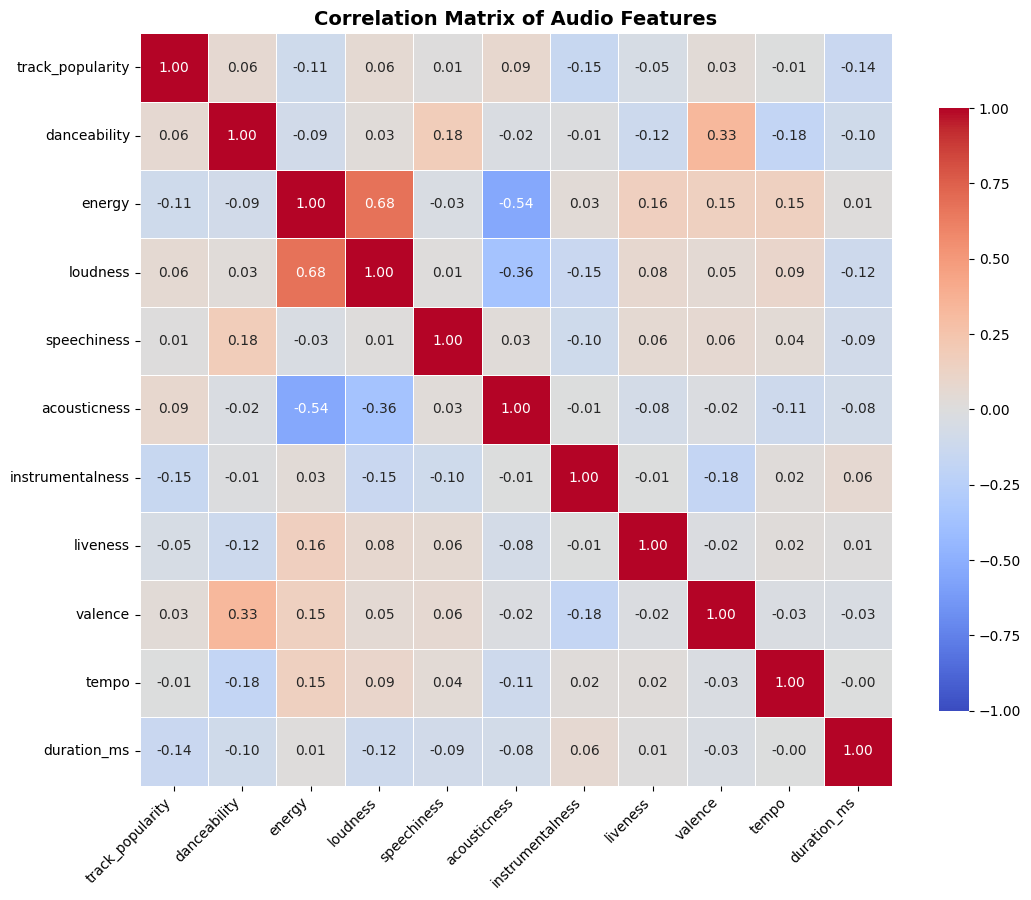

In [ ]:
numerical_features = music.select_dtypes("number")
corr_matrix = numerical_features.corr()

fig, ax = plt.subplots(figsize=(11, 9))

# cmap='coolwarm': Diverging palette centered at 0
# vmin=-1, vmax=1: Ensure the colors cover the full correlation range
sns.heatmap(corr_matrix, cmap="coolwarm", vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot=True, fmt=".2f", ax=ax)

ax.set_title("Correlation Matrix of Audio Features", fontsize=14, fontweight="bold")
# Correctly set tick labels using the axes object
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

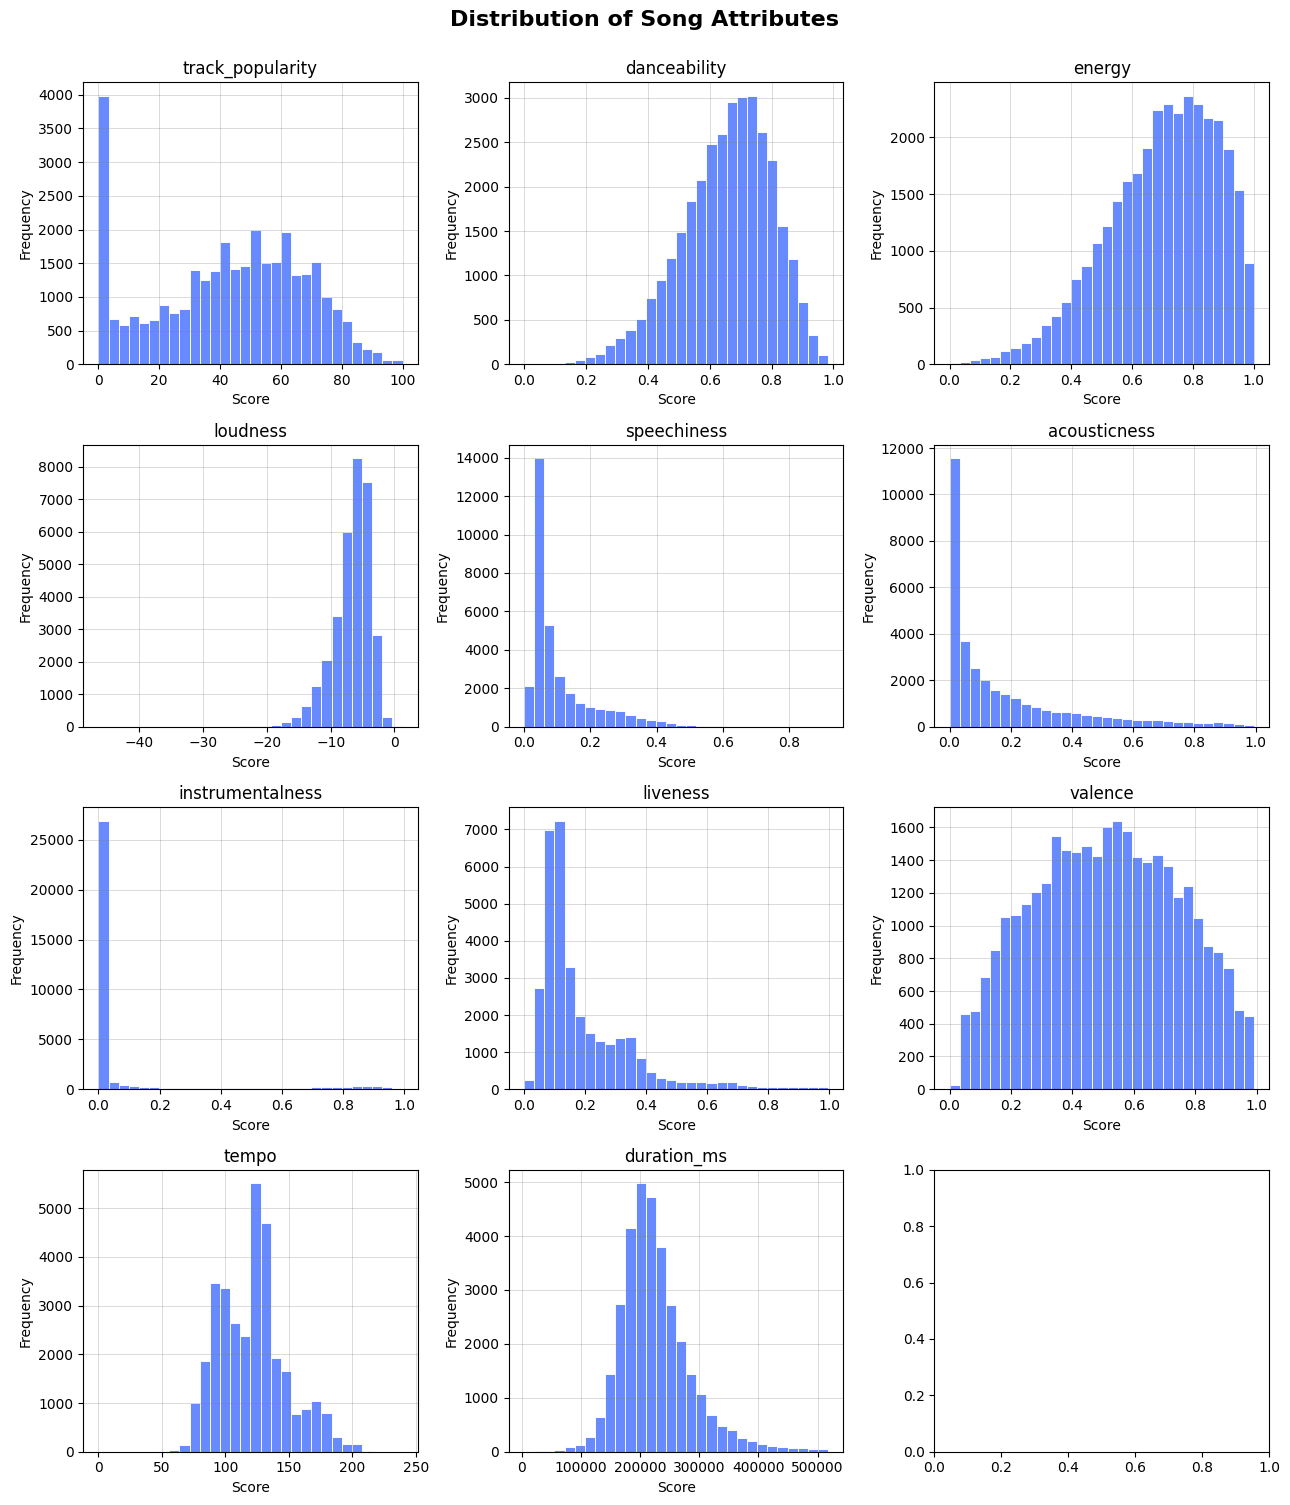

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(13, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    ax = axes[i]

    sns.histplot(data=music, x=col, ax=ax, color="b", edgecolor="white", bins=30, alpha=0.6)

    ax.set_title(col, fontsize=12)
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")
    ax.grid(linewidth=0.4, alpha=0.5, color="grey")

for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Song Attributes", fontsize=16, fontweight="bold", y=1)
plt.tight_layout()
plt.show()

In [ ]:
music["playlist_genre"].value_counts()

,count
playlist_genre,
edm,6043
rap,5746
pop,5507
r&b,5431
latin,5155
rock,4951


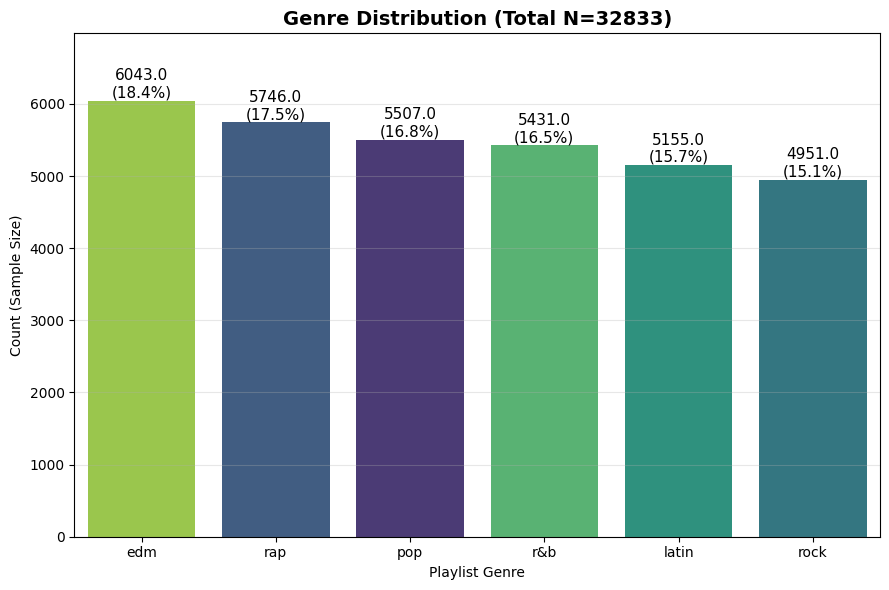

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

# Note: We order the bars by count to make the slight differences obvious (Pareto principle)
sns.countplot(
    data=music,
    x="playlist_genre",
    palette="viridis",
    hue="playlist_genre",
    order=music["playlist_genre"].value_counts().index,
    ax=ax
)

# This loop grabs the height of each bar and writes it on top
total = len(music)
for p in ax.patches:
    height = p.get_height()
    # Write the Count + The Percentage explicitly
    ax.annotate(f'{height}\n({height/total:.1%})',
                (p.get_x() + p.get_width() / 2., height),
                ha="center", va="bottom", fontsize=11, color="black")

ax.set_title(f"Genre Distribution (Total N={total})", fontweight="bold", fontsize=14)
ax.set_xlabel("Playlist Genre")
ax.set_ylabel("Count (Sample Size)")
ax.grid(axis='y', alpha=0.3)

ax.set_ylim(top=ax.get_ylim()[1] * 1.1)

plt.tight_layout()
plt.show()

### A protocol for “Can I separate genres with feature X?”

1. **Visual evidence** that separation is not an illusion of the plotting choice.
2. **Quantitative evidence** that the feature contains discriminative signal, and how much.


### Recommended order

1. **speechiness** (should show genre-linked structure; rap often stands out)
2. **energy** (structural axis)
3. **valence** (likely moderate, messy)
4. **instrumentalness** (requires the zero/non-zero split)


### How to explore without getting lost

You want freedom to try extra plots. Fine. Here’s the deal:

* You may add **one extra plot** per feature, maximum, and only if it tests a concrete suspicion (e.g., “maybe the tails separate”, then you do a log-scale or a zoomed x-limit).
* You stop as soon as:

  * the three core plots agree on the overlap story, and
  * the two metrics agree with your eyes.

That’s the stopping rule.


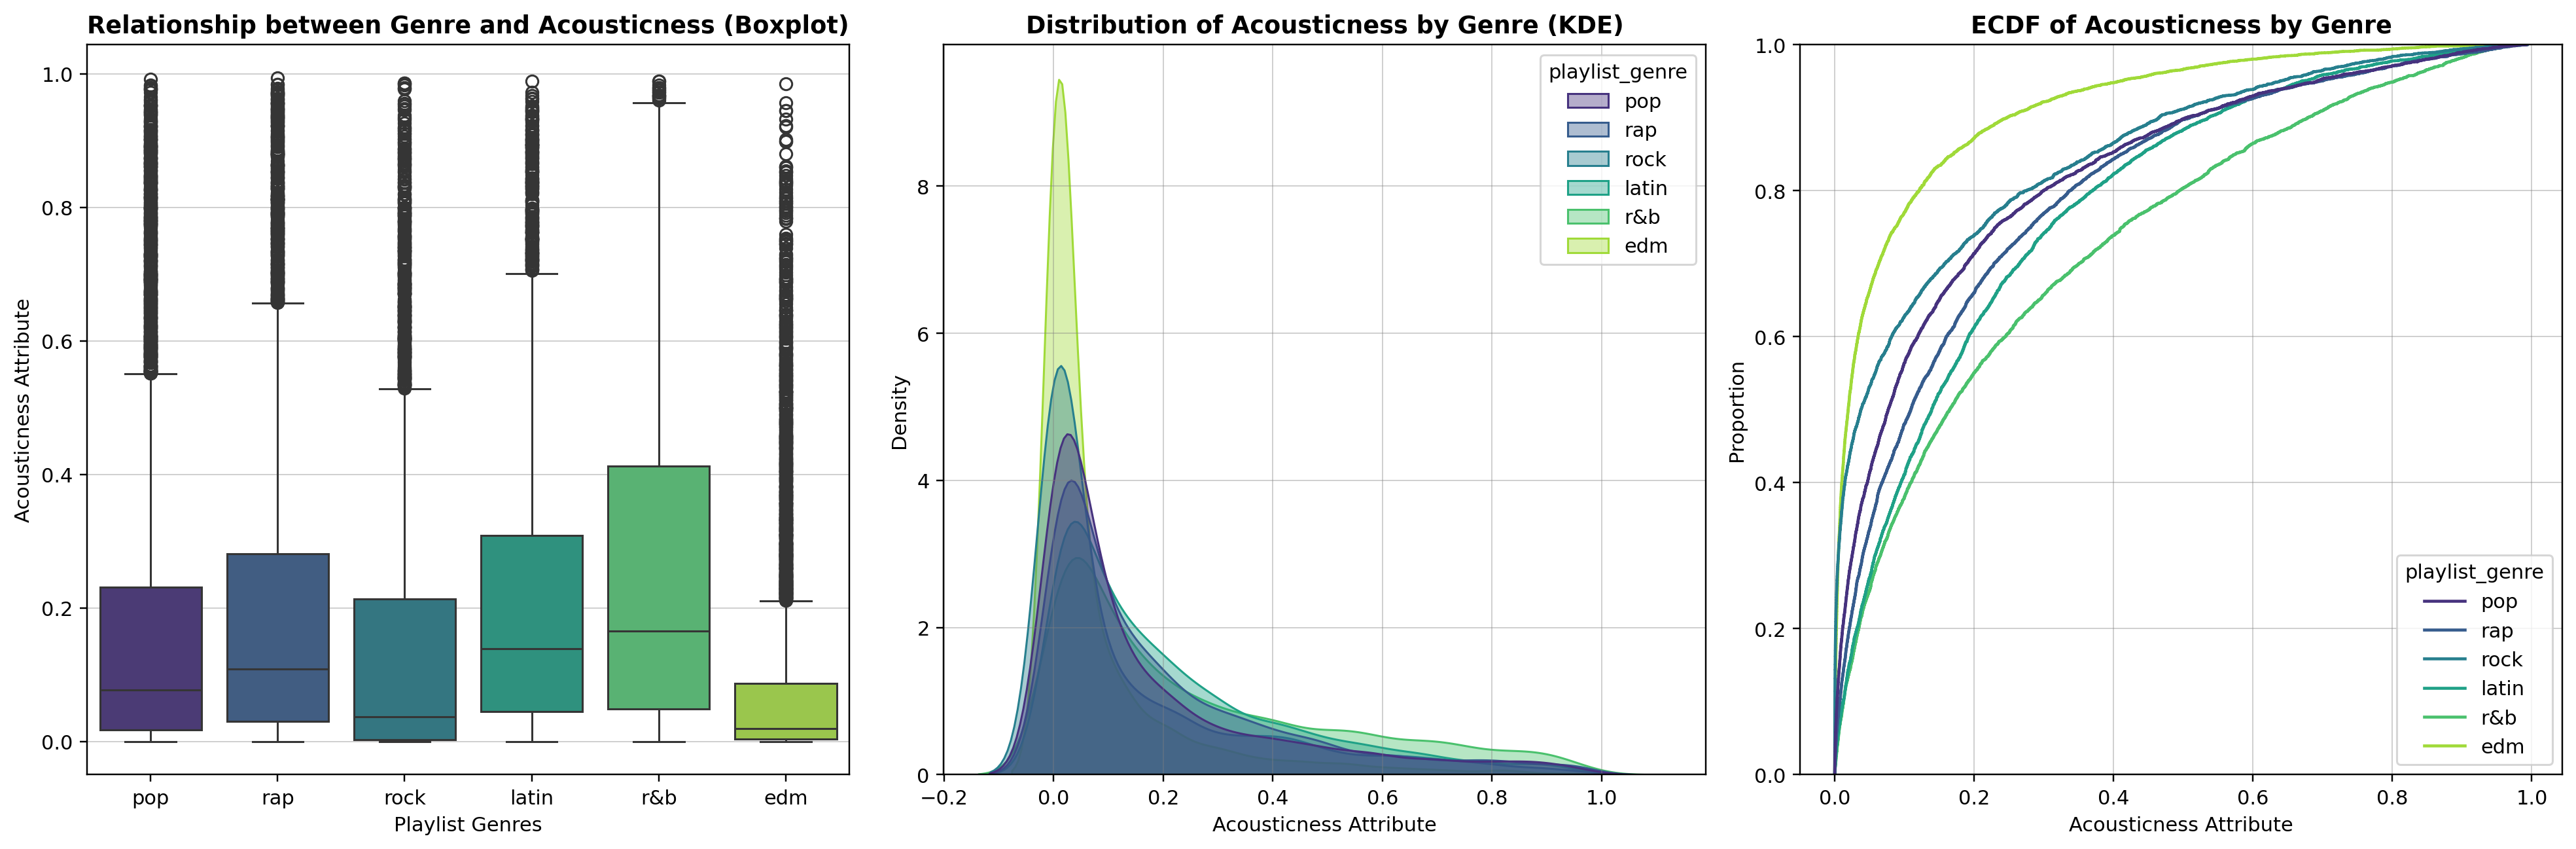

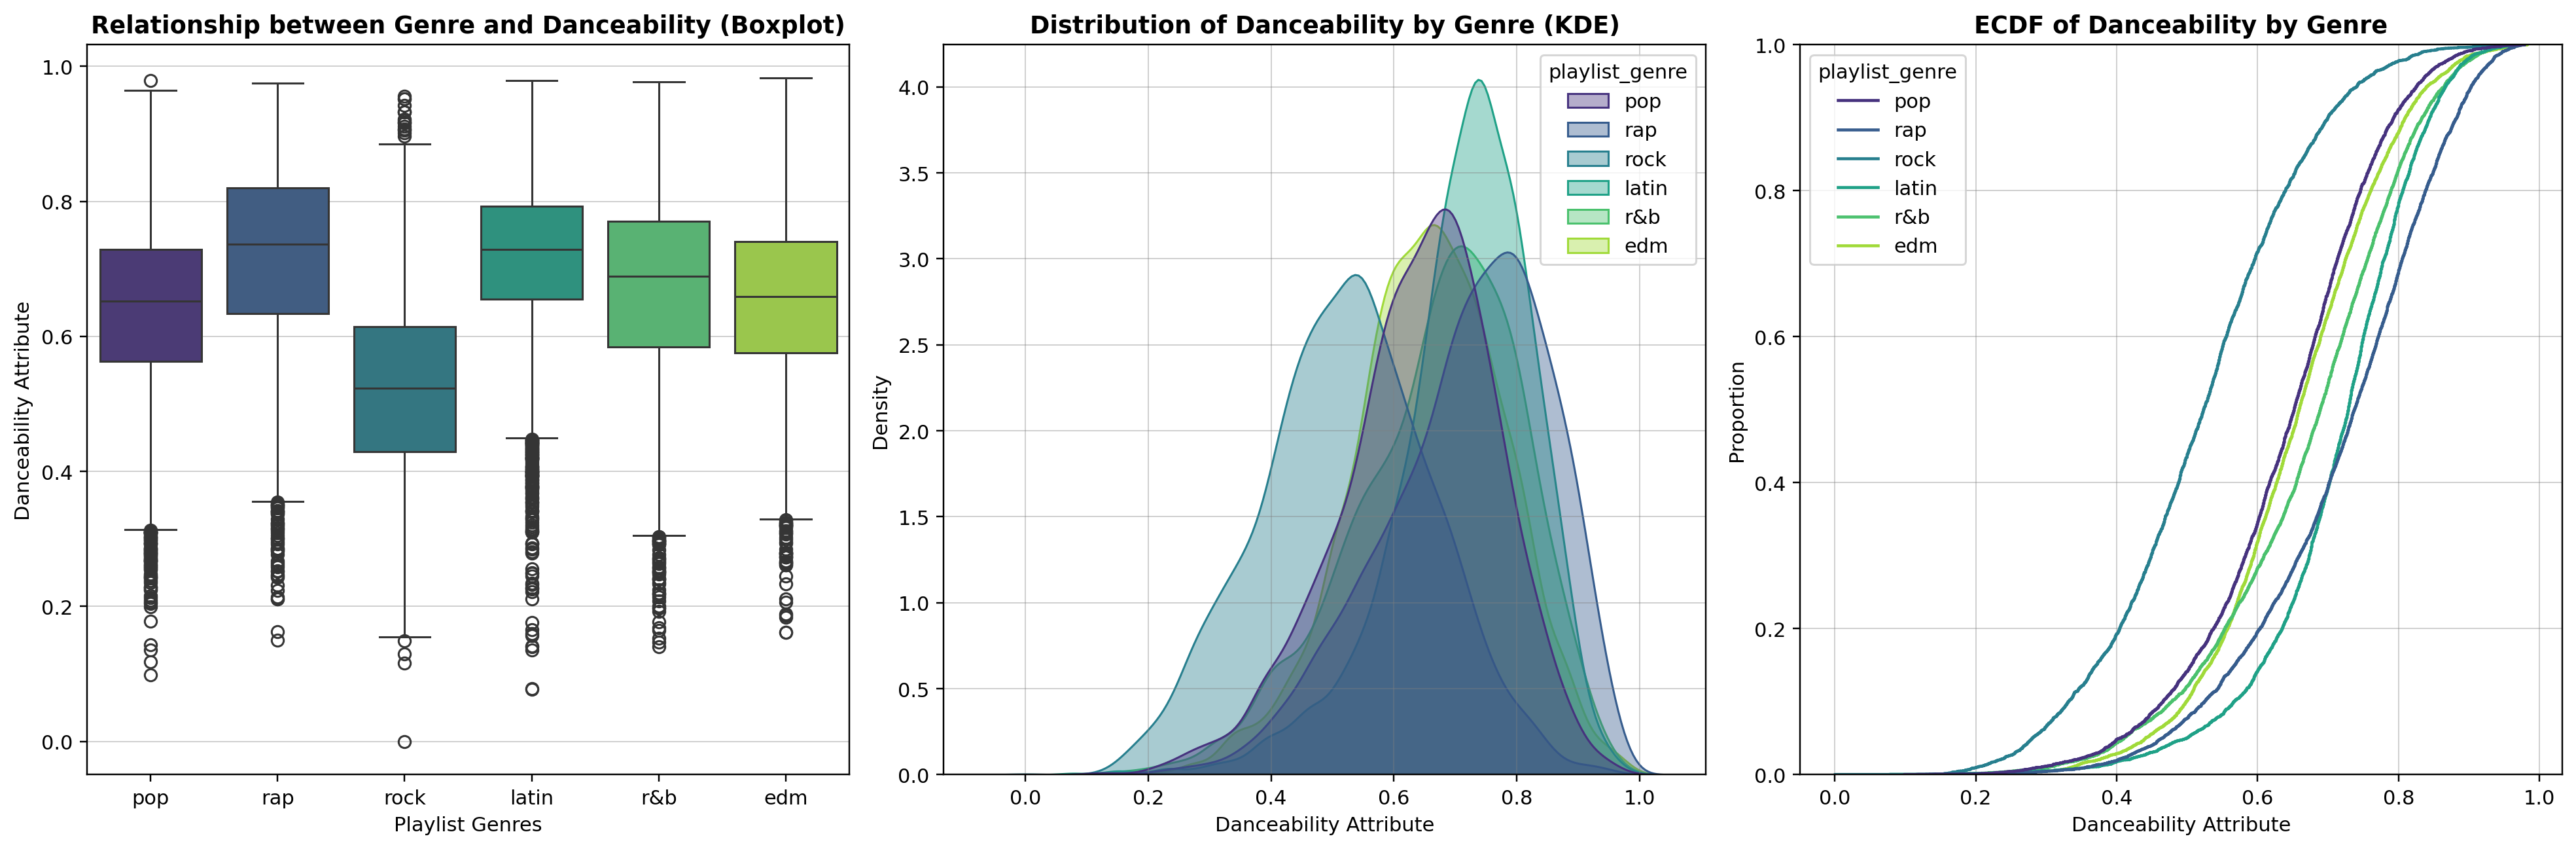

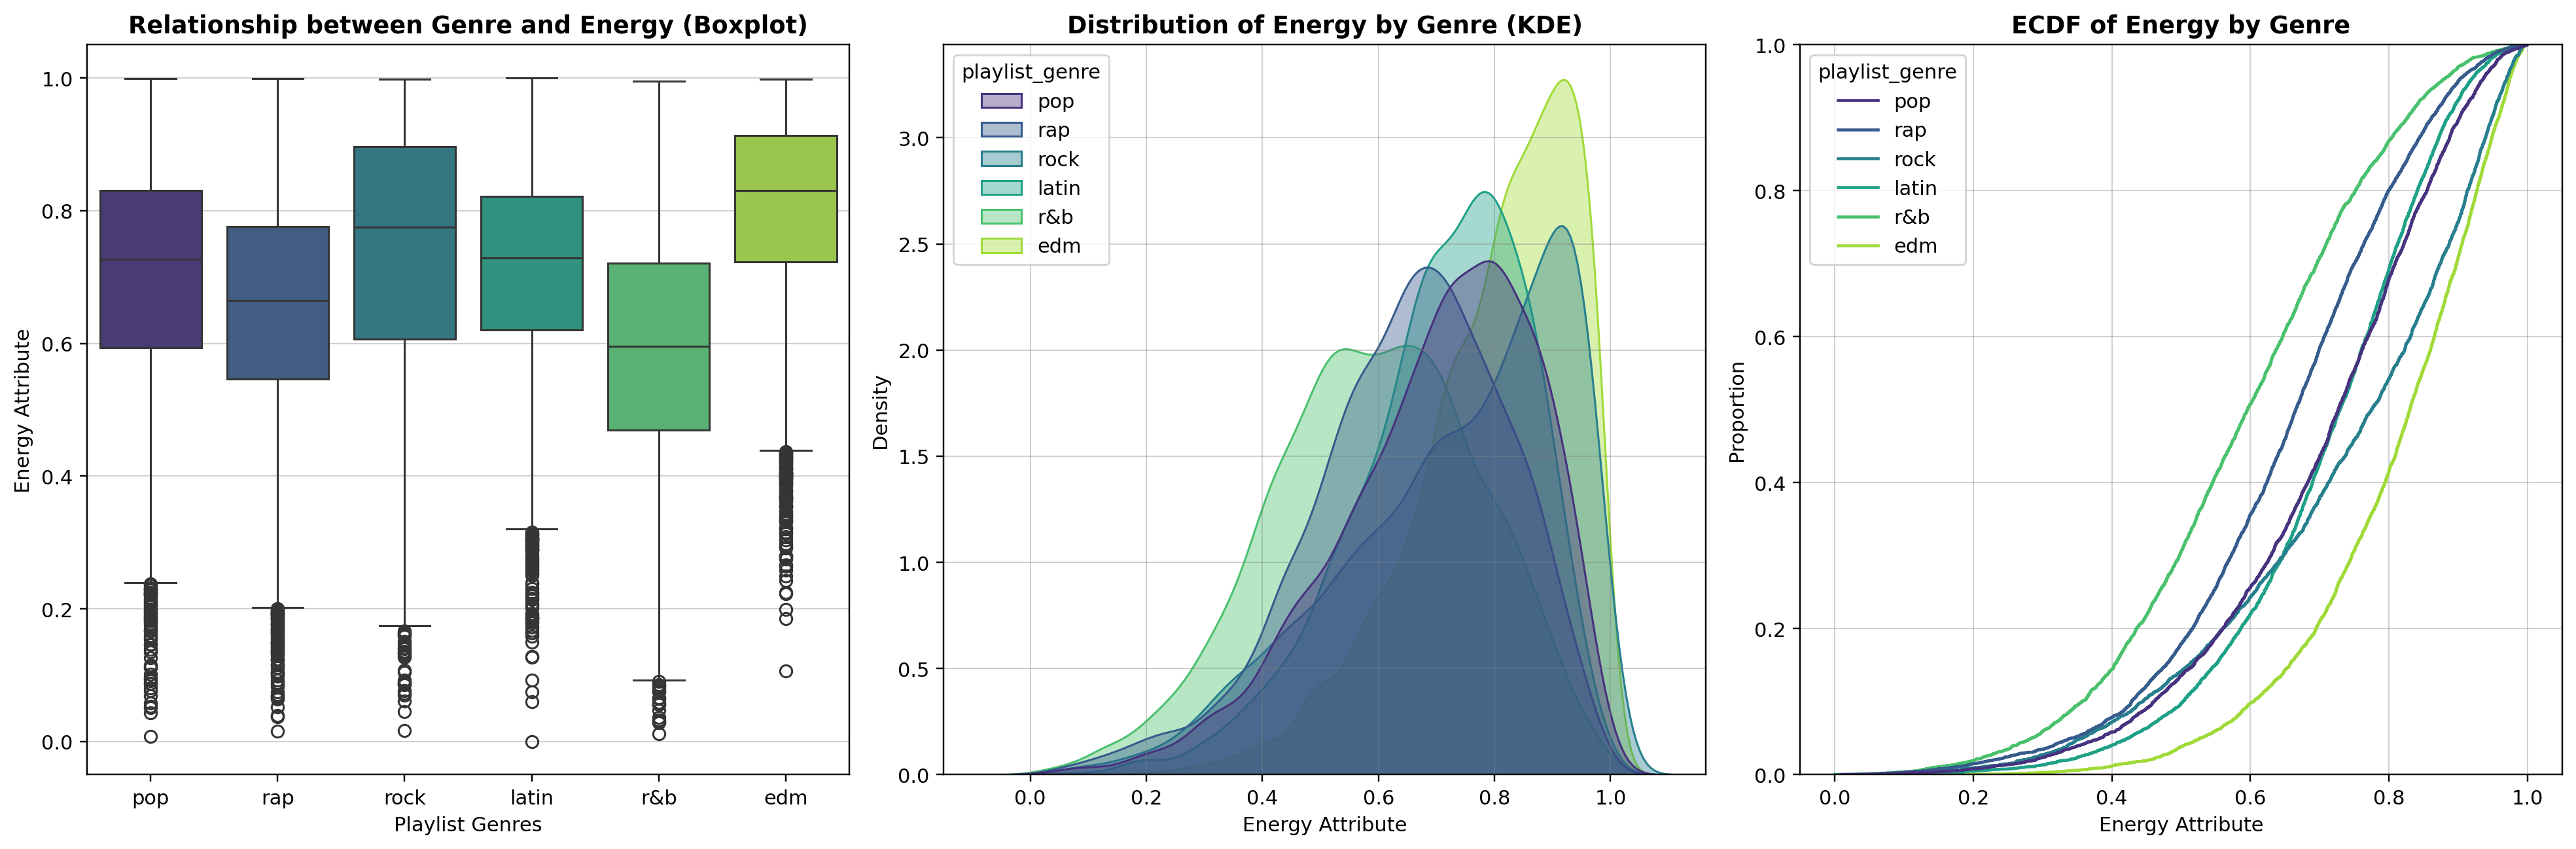

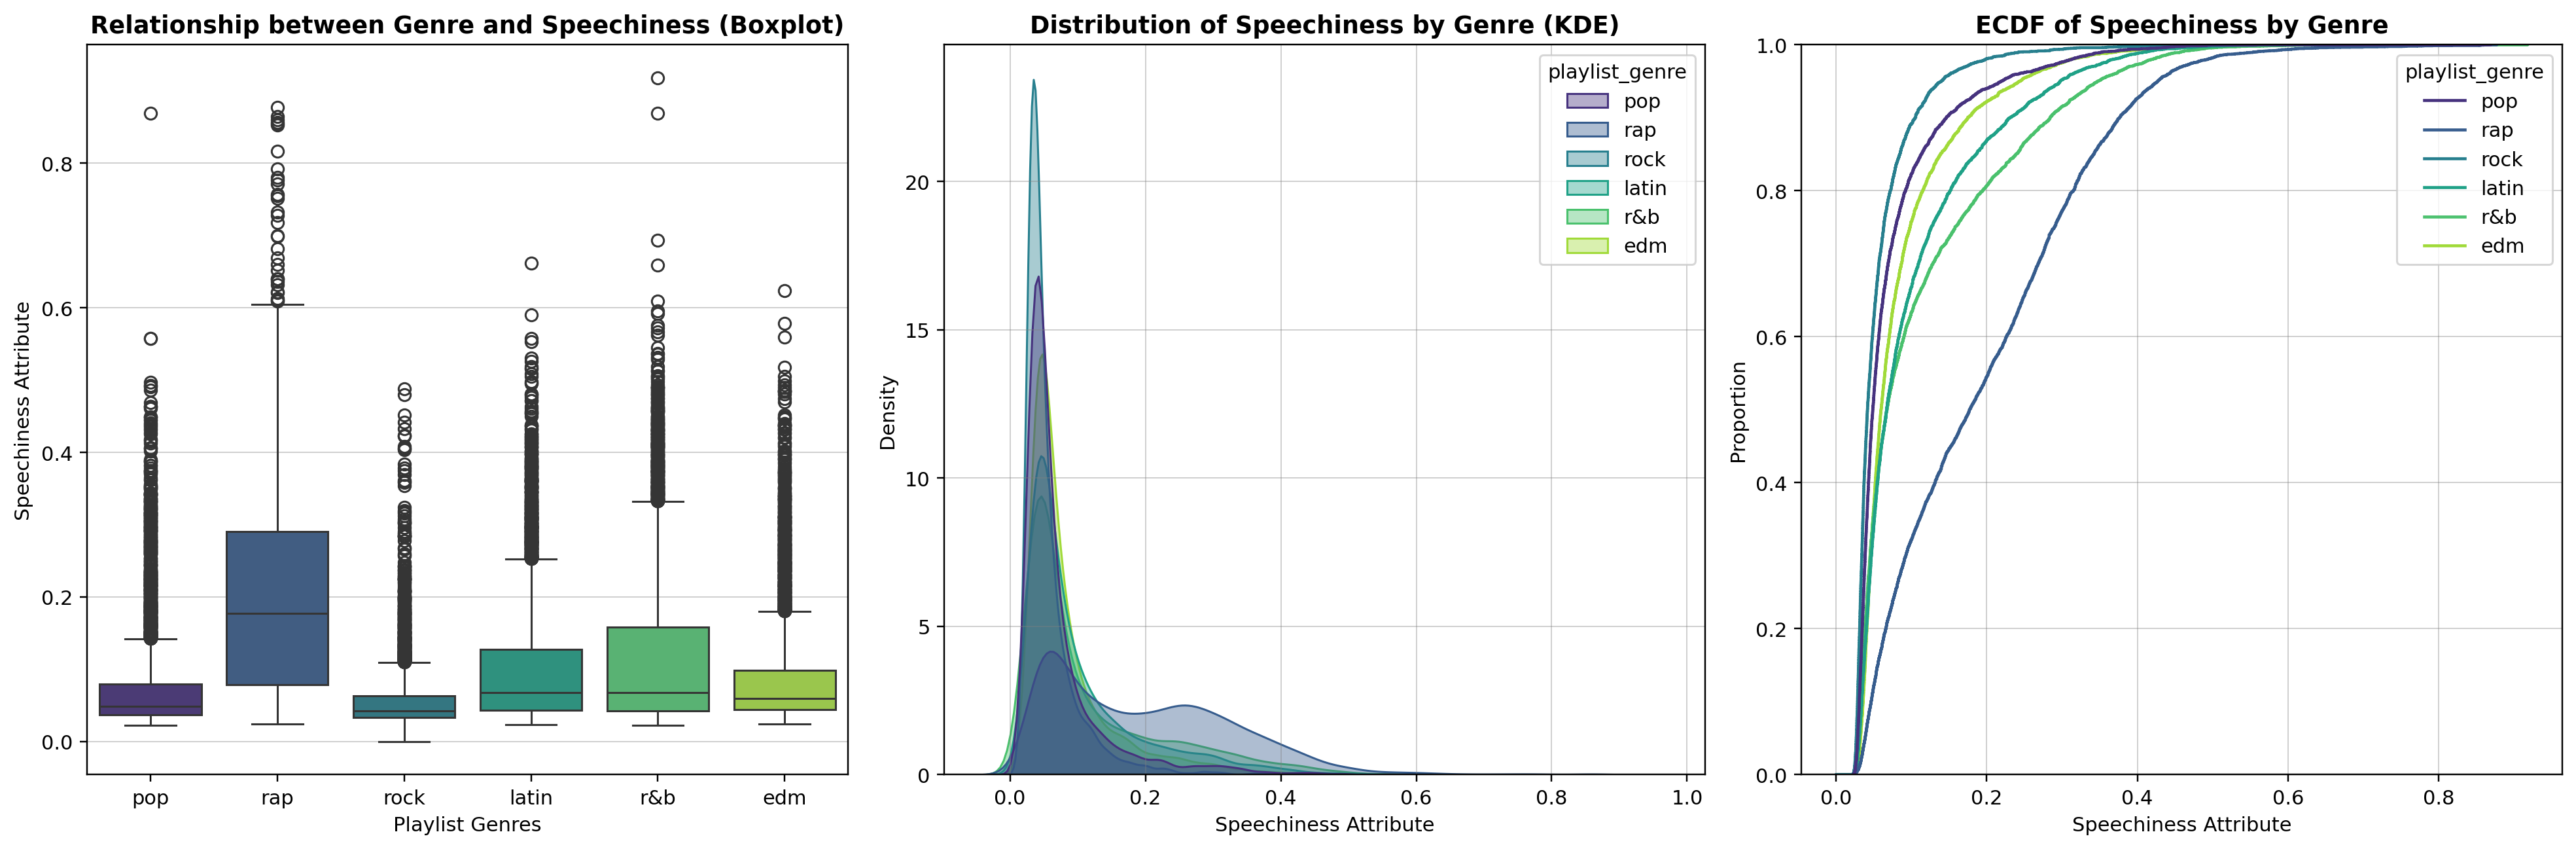

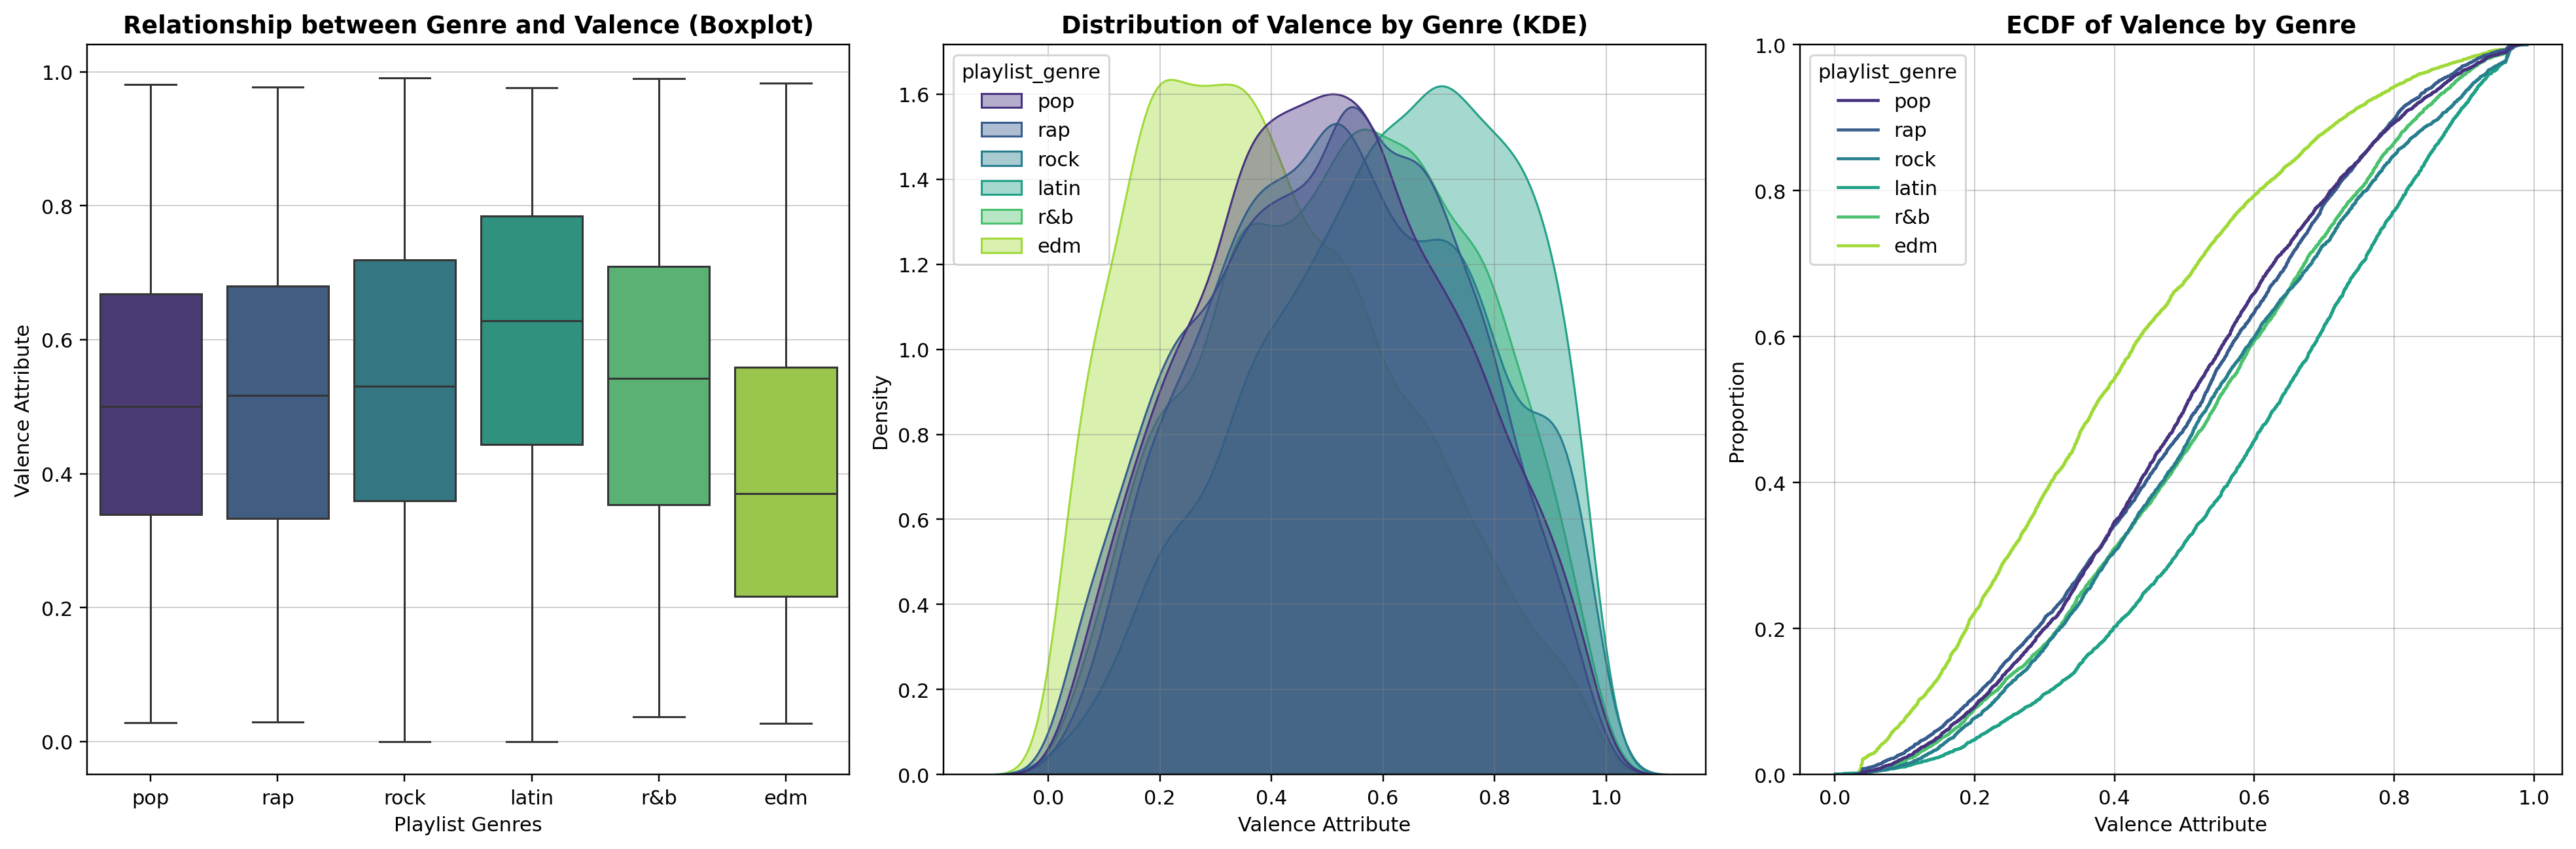

In [ ]:
for attribute in ["acousticness", "danceability", "energy", "speechiness", "valence"]:

    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(18, 6), dpi=220)

    # Plot 1: Boxplot (Categorical X, Numeric Y)
    sns.boxplot(data=music, x="playlist_genre", y=attribute,  hue="playlist_genre", palette="viridis", legend=False, ax=ax1)
    ax1.set(xlabel="Playlist Genres", ylabel=f"{attribute.title()} Attribute")
    ax1.set_title(f"Relationship between Genre and {attribute.title()} (Boxplot)", fontsize=12, fontweight="bold")
    ax1.grid(True, axis="y", linewidth=0.6, alpha=0.4, color="grey")

    # Plot 2: KDE Plot (Numeric X, Density Y)
    sns.kdeplot(data=music, x=attribute, hue="playlist_genre", palette="viridis", fill=True, common_norm=False, alpha=0.4, legend=True, ax=ax2)
    ax2.set(xlabel=f"{attribute.title()} Attribute", ylabel="Density")
    ax2.set_title(f"Distribution of {attribute.title()} by Genre (KDE)", fontsize=12, fontweight="bold")
    ax2.grid(True, linewidth=0.6, alpha=0.4, color="grey")

    # Plot 3: ECDF Plot (Numeric X, Proportion Y)
    # ECDF = Empirical Cumulative Distribution Function. Shows stochastic dominance clearly.
    sns.ecdfplot(data=music, x=attribute, hue="playlist_genre", palette="viridis", legend=True, ax=ax3)
    ax3.set(xlabel=f"{attribute.title()} Attribute", ylabel="Proportion")
    ax3.set_title(f"ECDF of {attribute.title()} by Genre", fontsize=12, fontweight="bold")
    ax3.grid(True, linewidth=0.6, alpha=0.4, color="grey")

    plt.tight_layout()
    plt.show()

### ANOVA Effect Size (η²) Formula

$$
η² = \frac{F \times df_{\text{between}}}{F \times df_{\text{between}} + df_{\text{within}}}
$$

Where:
- $F$ = F-statistic from one-way ANOVA
- $df_{\text{between}} = k - 1$ (degrees of freedom between groups)
- $df_{\text{within}} = N - k$ (degrees of freedom within groups)
- $k$ = number of genres
- $N$ = total sample size

In [ ]:
from scipy.stats import f_oneway

genres = music["playlist_genre"].unique()
anova_vars = ["energy", "acousticness", "danceability"]

anova_results = []
for var in anova_vars:
    groups = [music[music["playlist_genre"] == g][var] for g in genres]

    # Perform ANOVA
    f_stat, p_val = f_oneway(*groups)

    # Calculate effect size
    k = len(groups)
    N = sum(len(g) for g in groups)
    df_between = k - 1
    df_within = N - k
    eta_squared = (f_stat * df_between) / ((f_stat * df_between) + df_within)

    anova_results.append({
        "Variable": var,
        "F-statistic": round(f_stat, 3),
        "p-value": p_val,
        "η²": round(eta_squared, 3),
        "df (between)": df_between,
        "df (within)": df_within,
        "k": k,
        "N": N
    })

# Create ANOVA DataFrame
df_anova = pd.DataFrame(anova_results)
display(df_anova.sort_values(by="η²", ascending=False))

,Variable,F-statistic,p-value,η²,df (between),df (within),k,N
2,danceability,1559.980,0.0,0.192,5,32827,6,32833
0,energy,1045.875,0.0,0.137,5,32827,6,32833
1,acousticness,465.588,0.0,0.066,5,32827,6,32833


### Kruskal-Wallis Effect Size (ε²) Formula

$$
ε² = \frac{H - (k - 1)}{N - k}
$$

Where:
- $H$ = H-statistic from Kruskal-Wallis test
- $k$ = number of genres
- $N$ = total sample size

In [ ]:
from scipy.stats import kruskal

kruskal_vars = ["speechiness"]

kruskal_results = []
for var in kruskal_vars:
    groups = [music[music["playlist_genre"] == g][var] for g in genres]

    # Perform Kruskal-Wallis
    h_stat, p_val = kruskal(*groups)

    # Calculate effect size
    k = len(groups)
    N = sum(len(g) for g in groups)
    epsilon_squared = (h_stat - k + 1) / (N - k) if N > k else np.nan

    kruskal_results.append({
        "Variable": var,
        "H-statistic": round(h_stat, 3),
        "p-value": p_val,
        "ε²": round(epsilon_squared, 3),
        "k": k,
        "N": N
    })

# Create Kruskal-Wallis DataFrame
df_kruskal = pd.DataFrame(kruskal_results)
display(df_kruskal)

,Variable,H-statistic,p-value,ε²,k,N
0,speechiness,6355.514,0.0,0.193,6,32833


In [ ]:
X = music.copy()
X = music[["acousticness", "danceability", "energy", "speechiness", "valence"]]
y = music["playlist_genre"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train_transformed, y_train)

y_pred = lr_model.predict(X_test_transformed)

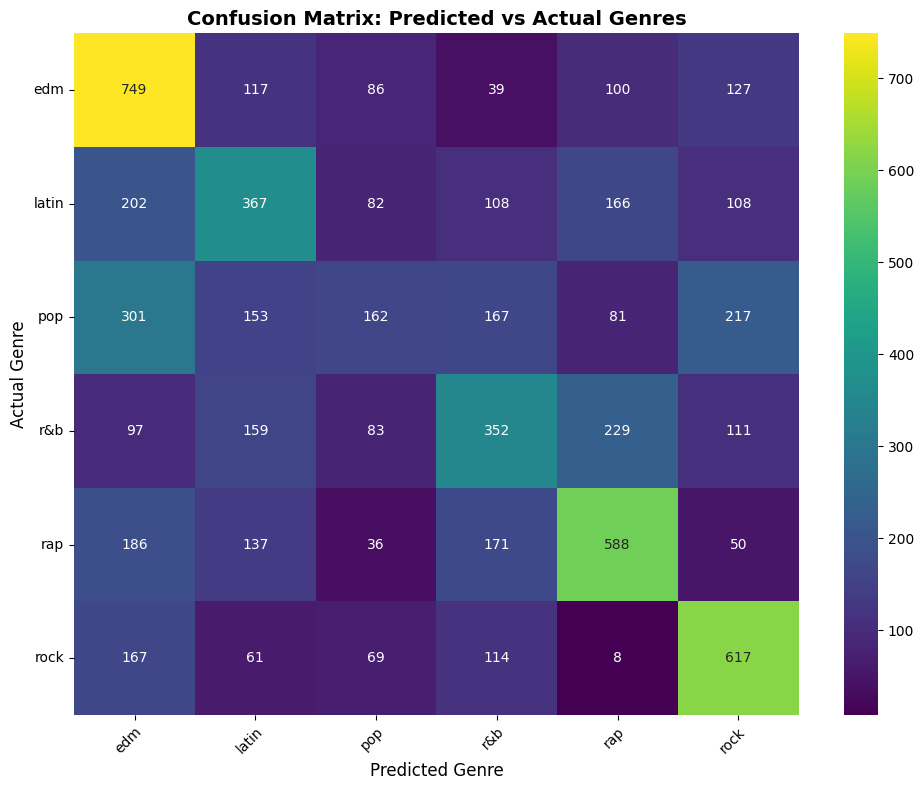


Classification Report:

              precision    recall  f1-score   support

         edm       0.44      0.61      0.51      1218
       latin       0.37      0.36      0.36      1033
         pop       0.31      0.15      0.20      1081
         r&b       0.37      0.34      0.36      1031
         rap       0.50      0.50      0.50      1168
        rock       0.50      0.60      0.54      1036

    accuracy                           0.43      6567
   macro avg       0.42      0.43      0.41      6567
weighted avg       0.42      0.43      0.42      6567



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)

# Initialize the figure and axes (OOP style)
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=lr_model.classes_,
            yticklabels=lr_model.classes_,
            ax=ax)

# Set titles and labels
ax.set_title('Confusion Matrix: Predicted vs Actual Genres', fontsize=14, fontweight='bold')
ax.set_xlabel('Predicted Genre', fontsize=12)
ax.set_ylabel('Actual Genre', fontsize=12)

# Rotate tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Print the classification report for detailed metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



```python
from sklearn.feature_selection import SelectFromModel

# Define the random forest model and fit to the training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

# Define the feature selection object
model = SelectFromModel(rf, prefit=True)

# Transform the training features
X_train_transformed = model.transform(X_train)

original_features = heart_disease_df.columns[:-1]
print(f"Original features: {original_features}")

# Select the features deemed important by the SelectFromModel
features_bool =  model.get_support()

selected_features = original_features[features_bool]
print(f"\nSelected features: {selected_features}")

feature_importance = pd.DataFrame({
    "feature": selected_features,
    "importance": rf.feature_importances_[features_bool]
})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"], feature_importance["importance"])
plt.show()
```



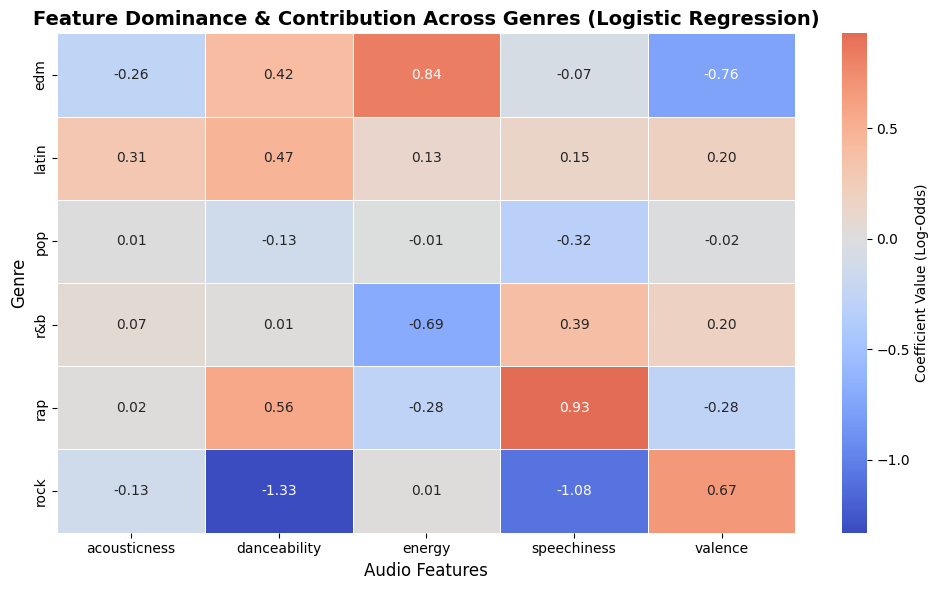

In [ ]:
# Create a DataFrame of the coefficients to visualize feature importance
# Since data was scaled, coefficients represent the impact of 1 SD change in the feature
coef_df = pd.DataFrame(lr_model.coef_, index=lr_model.classes_, columns=X.columns)

# Initialize the figure and axes (OOP style)
fig, ax = plt.subplots(figsize=(10, 6))

# Create a heatmap to visualize the direction and magnitude of feature contributions
# center=0 ensures 0 is white/neutral, distinguishing positive vs negative effects
sns.heatmap(coef_df, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            linewidths=.5, cbar_kws={'label': 'Coefficient Value (Log-Odds)'}, ax=ax)

# Set plot labels
ax.set_title("Feature Dominance & Contribution Across Genres (Logistic Regression)", fontsize=14, fontweight='bold')
ax.set_xlabel("Audio Features", fontsize=12)
ax.set_ylabel("Genre", fontsize=12)

# Ensure x-labels are readable
plt.setp(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()